In [65]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/rubybyrne/EoR/pyuvdata')
import pyuvdata
from pyuvdata import UVData
sys.path.append('/Users/rubybyrne/rlb_MWA/sky_imaging')
import calculate_empirical_rm

In [2]:
uv = UVData()

In [3]:
uv.read_uvfits('/Users/Shared/uvfits/4.1/1061316296.uvfits', read_data=False)

Required Antenna frame keyword not set, setting to ????
telescope_location is not set. Using known values for MWA.


In [4]:
antpos = uv.antenna_positions + uv.telescope_location
antpos = pyuvdata.utils.ENU_from_ECEF(antpos, *uv.telescope_location_lat_lon_alt)
antpos[:,0] -= (np.max(antpos[:,0])+np.min(antpos[:,0]))/2
antpos[:,1] -= (np.max(antpos[:,1])+np.min(antpos[:,1]))/2

In [96]:
print np.shape(uv.integration_time)
print len(set(uv.time_array))

(455168,)
56


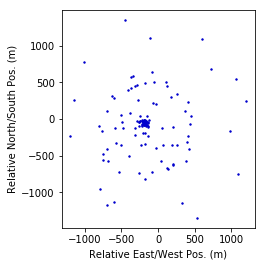

In [5]:
plt.scatter(antpos[:,0], antpos[:,1], marker='o', s=2., c='mediumblue')
plt.xlabel('Relative East/West Pos. (m)')
plt.ylabel('Relative North/South Pos. (m)')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [6]:
print (uv.uvw_array)**2.
baseline_lengths = np.sqrt(np.sum(np.abs(uv.uvw_array)**2., axis=1))
baseline_lengths = np.array(list(set(baseline_lengths)))

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.9615076e+03 1.9159630e+01 7.6525085e-02]
 [3.7543772e+03 4.4343896e-02 9.0570807e-02]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.1446851e+03 7.8370068e+03 6.8776113e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]


invalid value encountered in sqrt


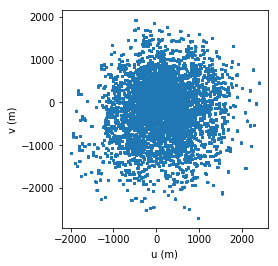

In [7]:
plt.plot(uv.uvw_array[:,0], uv.uvw_array[:,1], 'o', markersize=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.show()

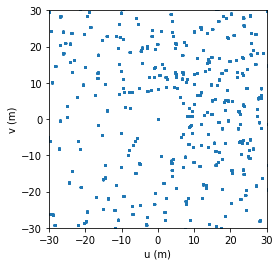

In [8]:
plt.plot(uv.uvw_array[:,0], uv.uvw_array[:,1], 'o', markersize=1, linewidth=.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.savefig('/Users/rubybyrne/Downloads/baseline_scatter.png', dpi=600)
plt.show()

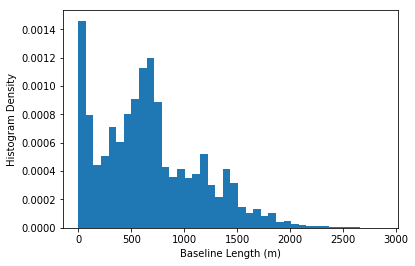

In [9]:
plt.hist(baseline_lengths, bins=40, density=True, log=False)
plt.xlabel('Baseline Length (m)')
plt.ylabel('Histogram Density')
plt.show()

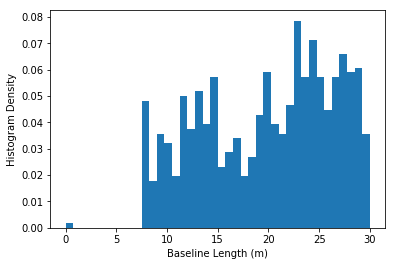

In [10]:
plt.hist(baseline_lengths, bins=40, density=True, log=False, range=(0,30))
plt.xlabel('Baseline Length (m)')
plt.ylabel('Histogram Density')
plt.show()

In [13]:
baseline_lengths_all = np.zeros((len(baseline_lengths), 384))
for freq_ind in range(384):
    baseline_lengths_all[:, freq_ind] = baseline_lengths*(uv.freq_array[0,freq_ind])/(3.*10**8)

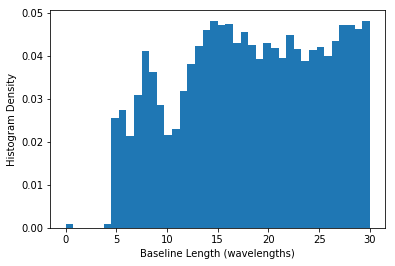

In [14]:
plt.hist(baseline_lengths_all.flatten(), bins=40, density=True, log=False, range=(0,30))
plt.xlabel('Baseline Length (wavelengths)')
plt.ylabel('Histogram Density')
plt.show()

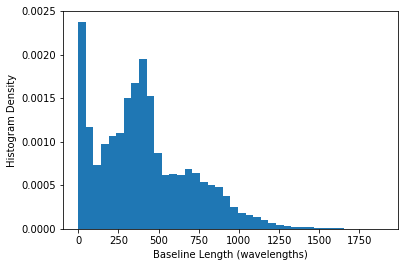

In [15]:
plt.hist(baseline_lengths_all.flatten(), bins=40, density=True, log=False)
plt.xlabel('Baseline Length (wavelengths)')
plt.ylabel('Histogram Density')
plt.show()

In [26]:
obs_list_1 = [
    '1131551744',
    '1130783824',
    '1131562544',
    '1131709912',
    '1130776864',
    '1131461496',
    '1130782264',
    #'1131454176', high power and systematics in Stokes V
    '1131715432',
    '1131733552',
    '1131542624',
    '1130773144',
    '1131461376',
    '1131557144',
    '1131454296',
    '1131731752',
    '1130778664',
    '1131470496',
    '1131559064',
    '1131717232',
    '1131463536',
    '1130773264',
    '1131463416',
    '1131717352',
    '1131713632',
    '1131478056',
    '1131468936',
    '1131468696',
    '1131535424',
    '1131463296',
    '1131465216',
    '1131710032',
    '1130776624',
    '1131456096',
    #'1131456216',
    '1131540824',
    '1131711952',
    '1131459576',
    '1131477936',
    '1131733672',
    '1131564464',
    '1130787784',
    #'1131475896',
    '1131461616',
    '1131558944',
    '1131470616',
    '1131549944',
    '1131553544',
    #'1131477816',
    '1131459696',
    '1130780464',
    '1131726352',
    #'1131715312',
    '1131470736',
    '1131548024',
    '1131710152',
    '1130785864',
    #'1131724672',
    '1131544424'
]

obs_list_2 = ['1131542504',
    #'1131717112',
    '1131733432',
    '1131735232',
    '1131553664',
    '1131724432',
    '1131542744',
    '1131455976',
    '1131719152',
    '1131454416',
    #'1131728032',
    '1130787544',
    '1130776744',
    #'1131726472',
    '1130780224',
    '1131551624',
    '1131722632',
    '1131547904',
    '1130776624',
    '1131562664',
    '1131550064',
    '1131537104',
    '1131555224',
    '1131467136',
    '1131539024',
    '1131555344',
    '1131546104',
    '1131548144',
    '1131472416',
    '1131558824',
    '1131544304',
    '1130789584',
    '1131476136',
    '1130789344',
    #'1131728272',
    '1131722872',
    '1130785744',
    '1131730072',
    '1131459816',
    '1131564584',
    '1131457776',
    '1131724552',
    '1130787664',
    '1130778424',
    '1131728152',
    '1131722752',
    '1131538904',
    '1131544544',
    '1130778544',
    '1131467016',
    '1131546344',
    '1130789464',
    '1131713512',
    '1131546224',
    '1131474336',
    '1130782144',
    '1131735472',
    '1130775064',
    '1130774824',
    '1131720832',
    '1130774944',
    '1131557264',
    '1130783944',
    #'1131713752',
    '1131472296',
    '1131465096',
    '1131457896',
    '1131555464',
    #'1131720712',
    #'1131711832',
    '1131562424',
    '1131551864',
    '1131540704',
    '1130780344',
    '1131731632',
    '1131468816',
    #'1131711712',
    '1131472536',
    #'1131729832',
    '1130773024',
    #'1131720952',
    #'1131718912',
    #'1131719032',
    '1131474096',
    '1131465336',
    '1131715552',
    '1131458016',
    '1131540944',
    '1131557024',
    '1131731872',
    '1131553424',
    '1131560864',
    '1130784064',
    '1131466896',
    '1130782024',
    '1131560624',
    '1131474216',
    '1131564344',
    '1131729952',
    '1131560744',
    '1130785624',
    '1131709432',
    '1131536624',
    '1131536384',
    '1131711112',
    '1131709192',
    '1131710992',
    #'1131709792', stripes in V
    '1131453456',
    '1131565304',
    '1131478776',
    '1131566504',
    '1131565184',
    '1131566624',
    '1131566744',
    '1131565064',
    '1131567944',
    '1131478656',
    '1131568544',
    #'1131740872', excess power
    '1131739432',
    '1130788504',
    '1130788264',
    '1131740752',
    #'1131735952', # maybe excess power
    #'1131739552', excess power
    '1131455736',
    '1131710392',
    '1131708952',
    '1131457176',
    '1131716512',
    #'1131713272', excess power
    '1131458976',
    '1131712192',
    '1131453936',
    '1131457536',
    '1131537704',
    '1131543584'
]
rm_file = '/Users/rubybyrne/rm_empirical_calculation/Jul2020_align_with_avg/diffuse_survey_rm_empirical_in_eor0_Aug2020.csv'
rm_data = np.genfromtxt(
    rm_file, delimiter=',', dtype=None, names=True, encoding=None
)
rms = np.array([
    rm_data['RM'][np.where(rm_data['ObsID'] == int(obsid))][0] for obsid in obs_list_1+obs_list_2
])

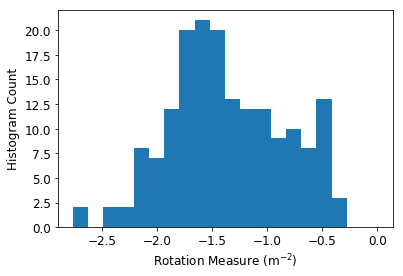

In [81]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,4))
plt.hist(rms, range=[np.min(rms),0], bins=20)
plt.xlabel('Rotation Measure (m$^{-2}$)')
plt.ylabel('Histogram Count')
plt.savefig('/Users/rubybyrne/Downloads/RM_hist', dpi=600)
plt.show()

In [46]:
rm_orig_file = '/Users/rubybyrne/diffuse_survey_rm_tot.csv'
rm_orig_data = np.genfromtxt(
    rm_orig_file, delimiter=',', dtype=None, names=True, encoding=None
)
rms_orig = np.array([
    rm_orig_data['RM'][np.where(rm_orig_data['ObsID'] == int(obsid))][0] for obsid in obs_list_1+obs_list_2
])

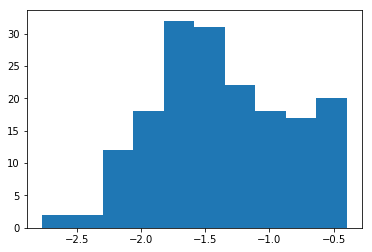

In [47]:
plt.hist(rms_orig)
plt.show()

In [75]:
rot_angles = calculate_empirical_rm.get_effective_rotation_angles(rms, 167., 198.)
rot_angles_orig = calculate_empirical_rm.get_effective_rotation_angles(rms_orig, 167., 198.)

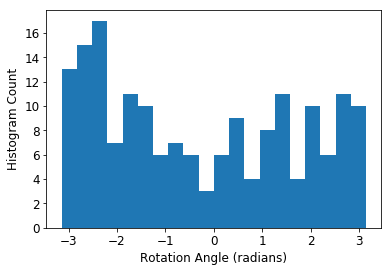

In [80]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,4))
plt.hist(rot_angles, range=[-np.pi, np.pi], bins=20)
plt.xlabel('Rotation Angle (radians)')
plt.ylabel('Histogram Count')
plt.savefig('/Users/rubybyrne/Downloads/rot_angle_hist', dpi=600)
plt.show()

[ 0.10362238 -0.00155214  0.04630218  0.08310726  0.08077164  0.10580954
  0.12969208  0.03738824  0.14249738 -0.03366279  0.00493225  0.1670726
  0.01388126  0.10970049 -0.01106061  0.25647025  0.08986794  0.0805279
  0.14812054]
0.25647024652694994


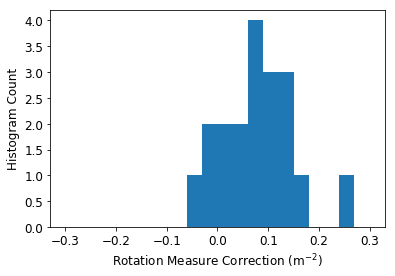

In [90]:
rm_diff = rms-rms_orig
rm_diff = rm_diff[np.where(rm_diff != 0)]
print rm_diff
print np.max(np.abs(rm_diff))
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,4))
plt.hist(rm_diff, range=[-.3, .3], bins=20)
plt.xlabel('Rotation Measure Correction (m$^{-2}$)')
plt.ylabel('Histogram Count')
plt.savefig('/Users/rubybyrne/Downloads/RM_hist_diff', dpi=600)
plt.show()

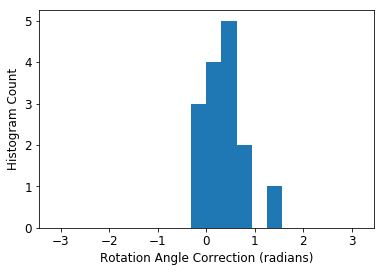

In [89]:
rot_angles_diff = rot_angles-rot_angles_orig
rot_angles_diff = rot_angles_diff[np.where(rot_angles_diff != 0)]
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,4))
plt.hist(rot_angles_diff, range=[-np.pi, np.pi], bins=20)
plt.xlabel('Rotation Angle Correction (radians)')
plt.ylabel('Histogram Count')
plt.savefig('/Users/rubybyrne/Downloads/rot_angle_hist_diff', dpi=600)
plt.show()